`Quickhull Algorithm`: An efficient algorithm for solving the convex hull problem using the divide and conquer approach.

Goven a set of 2d points, `S`, the goal of the convex hull problem is to find the smallest convex polygon containing all the points and whose vertices consist of points from `S`. 

In [71]:
import math
import sys


import math
import sys

def hoare_partition(A, lo, hi, c):
    i = lo+1
    j = hi
    p = A[lo][c]
    while True:
        #print(f"i = {i}, c = {c}, A[{i}, 0] = {A[i][0]}, A[{i}, 1] = {A[i][1]}")
        #print(f"lo = {lo}, hi = {hi}, p = {p}")
        while((A[i][c] <= p) and (i < hi)):
            #print(f"i = {i}")
            i += 1
        while((A[j][c] >= p) and (j > lo)):
            j-= 1 
        
        if (i >= j):
            break
        
        #print(f"i = {i}, j = {j}")
        #print(f"Before swap = {A}")
        
        temp = A[i]
        A[i] = A[j]
        A[j] = temp

        #print(f"After swap  = {A}")

    temp = A[j]
    A[j] = A[lo]
    A[lo] = temp
    return j

# modified quicksort for sorting list of tuples. c is the component of the tuple that will be used for the sorting order
def quick_sort(A, lo, hi, c):
    if(lo < hi):

        # apply Hoare partitioning
        s = hoare_partition(A, lo, hi, c)
        
        # recursively sort the left and right sub arrays
        quick_sort(A, lo, s-1, c)
        quick_sort(A, s+1, hi, c)


def quickhull(S):

    # pre-processing step: sort all the points in non-decreasing order in the x-coordinate
    quick_sort(S, 0, len(S)-1, 0)

    # check for ties in x-coordinate values, resolve by sorting tied values in non-decreasing order in their y-coordinate
    i = 1
    while(i < (len(S)-1)):
        if(S[i-1][0] == S[i][0]):
            lo = i-1
            j = i+1    
            while((S[j-1][0] == S[j][0]) and (j < (len(S)-1))):
                j += 1
            i = j + 1
            hi = j - 1

            # sort poiunts with tied x-values in non-decreasing order of their y-coordinates
            quick_sort(S, lo, hi, 1)    
            
        else:
            i += 1        

    print(f"Sorted points: {S}\n")

    # invoke recursive quickhull
    extreme_points = []
    
    # add p1 and pn to extreme points
    extreme_points.append(S[0])
    extreme_points.append(S[-1])
    
    quickhull_rec(S,extreme_points)

    print(f"Extreme points of upper hull: {extreme_points}")
    return extreme_points

# recursive convex hull solver via divide and conquer
def quickhull_rec(S, extreme):

    # recursion base-case
    if(len(S) < 3):
        print(f"Reached base case! S: {S}")

    else:
        # leftmost and rightmost extreme points are p1 and pn respectively
        p1 = S[0]
        pn = S[-1]

        print(f"p1: {p1}, pn: {pn}")

        # S1 is the set of all points to the left of line directed from pi to pn and S2 is the set of all points to the right of line. Both sets should include p1 and pn
        S1 = [p1]
        S2 = [p1]
        
        # find the farthest point on the left of the line directed form p1 to pn
        p1_pn = (pn[0]-p1[0], pn[1]-p1[1])
        dmax = 0
        pmax = None
        pmax_position = None
        S1_count = 1
        for i in range(1, len(S)-1):

            # for every point, compute the vector cross product between p1_pn and p1_pi 
            # if the z-component of the resulting vector is positive, that means point pi lies to the 
            # left of the line
            pi = S[i]
            p1_pi = (pi[0]-p1[0], pi[1]-p1[1])
            cross = p1_pn[0]*p1_pi[1] - p1_pn[1]*p1_pi[0]
            if(cross > 0):
                S1.append(pi)

                # check to see if this is the farthest point from the line
                # (the distance is just 2*A/length(p1_pn), where A is the area of the traingle formed by points p1, pn and pi, which is also 1/2 * cross product)
                d = abs(cross) / dist(p1, pn)
                if(d > dmax):
                    dmax = d
                    pmax = pi
                    pmax_position = S1_count

                S1_count += 1     

            else: 
                S2.append(pi)    
       
        # S1 and S2 should include pn
        S1.append(pn)
        S2.append(pn)

        # add pmax to extreme points
        if(pmax != None):
            extreme.append(pmax)
            
            print(f"\nS1: {S1}\n\n")
            print(f"S2: {S2}")
            print(f"\npmax: {pmax}, pmax_position: {pmax_position}")

            # discard all the points from S1 which have x-coordinate greater than that of pmax
            #S1 = S1[:pmax_position+1]
            #print(f"\nS1 (upto pmax): {S1}\n\n")
            
            # recursively call quickhull on all point in S1 up to and including pmax
            quickhull_rec(S1[:pmax_position+1],extreme)

            # recursively call quickhull on all point in S1 from pmax to remiaining 
            quickhull_rec(S1[pmax_position:],extreme)



def dist(p1, p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)


Sorted points: [(2, 82), (6, 58), (7, 14), (10, 62), (12, 71), (13, 8), (14, 81), (15, 58), (17, 61), (19, 72), (21, 31), (26, 48), (29, 22), (30, 50), (38, 10), (51, 4), (51, 73), (65, 1), (69, 69), (72, 89), (73, 64), (76, 23), (77, 9), (80, 2), (85, 4), (87, 53), (88, 25), (88, 44), (95, 77), (97, 27)]

p1: (2, 82), pn: (97, 27)

S1: [(2, 82), (14, 81), (51, 73), (69, 69), (72, 89), (73, 64), (87, 53), (88, 44), (95, 77), (97, 27)]


S2: [(2, 82), (6, 58), (7, 14), (10, 62), (12, 71), (13, 8), (15, 58), (17, 61), (19, 72), (21, 31), (26, 48), (29, 22), (30, 50), (38, 10), (51, 4), (65, 1), (76, 23), (77, 9), (80, 2), (85, 4), (88, 25), (97, 27)]

pmax: (95, 77), pmax_position: 8
p1: (2, 82), pn: (95, 77)

S1: [(2, 82), (72, 89), (95, 77)]


S2: [(2, 82), (14, 81), (51, 73), (69, 69), (73, 64), (87, 53), (88, 44), (95, 77)]

pmax: (72, 89), pmax_position: 1
Reached base case! S: [(2, 82), (72, 89)]
Reached base case! S: [(72, 89), (95, 77)]
Reached base case! S: [(95, 77), (97, 27)]


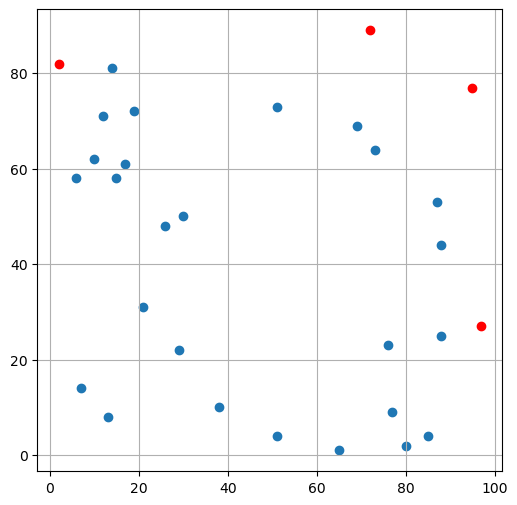

In [72]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
Ax = np.random.randint(1,100, size=(30))
Ay = np.random.randint(1,100, size=(30))
A = list(zip(Ax,Ay))

#A = [(2,4), (1,7), (6,4), (2,8), (3,3), (7,2), (2,2), (9,12), (5,4),(2,16), (9,6), (8,15)]

extreme = quickhull(A)
A_wo_extreme = A.copy()
for p in extreme:
    A_wo_extreme.remove(p)

print(f"A: {A}")
print(f"A_wo_extreme: {A_wo_extreme}")

x_wo_extreme = [p[0] for p in A_wo_extreme]
y_wo_extreme = [p[1] for p in A_wo_extreme]
x_extreme = [p[0] for p in extreme]
y_extreme = [p[1] for p in extreme]

plt.figure(figsize=(6,6))
plt.scatter(x_wo_extreme,y_wo_extreme)
plt.scatter(x_extreme,y_extreme, color='red')
plt.grid()
plt.show()


